# Trabajo Práctico 2 - Matrices Insumo-Producto


## Imports

In [67]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import scipy.linalg as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import display, HTML

## Consigna 2 - Graficamos los vectores $a_1$ y $a_2$, definidos con un tamaño de 250

In [5]:
A1 = np.array([[0.186,0.521,0.014,0.32,0.134],
               [0.24,0.073,0.219,0.013,0.327],
               [0.098,0.12,0.311,0.302,0.208],
               [0.173,0.03,0.133,0.14,0.074],
               [0.303,0.256,0.323,0.225,0.257]])
A2 = np.array([[0.186,0.521,0.014,0.32,0.134],
               [0.24,0.073,0.219,0.013,0.327],
               [0.098,0.12,0.311,0.302,0.208],
               [0.173,0.03,0.133,0.14,0.074],
               [0.003,0.256,0.323,0.225,0.257]])

##Vamos a calcular el vector que tiene en cada componente la norma 2 de A elevado al indice i
def vectorDeA_n(n, matrizOriginal):
    res = []
    potenciaDeA = matrizOriginal
    for i in range(n):
        potenciaDeA = potenciaDeA @ matrizOriginal 
        norma = scipy.linalg.norm(potenciaDeA, ord = 2)
        res.append(norma)
    return res

def graficarVector(matriz, tamanio):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(np.linspace(0,tamanio-1,tamanio), vectorDeA_n(tamanio, matriz), s=10, color='aquamarine', edgecolor='k', alpha=0.7)

    # Personalización del gráfico
    ax.set_title("Norma 2 de A1 a Potencias Sucesivas", fontsize=14, fontweight='bold')
    ax.set_xlabel("Índice de la potencia", fontsize=12)
    ax.set_ylabel("Valor de la Norma 2", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Guardar el gráfico
    plt.savefig('diagrama-dispersion-A1.png', dpi=300, bbox_inches='tight')
    plt.show()

NameError: name 'scipy' is not defined

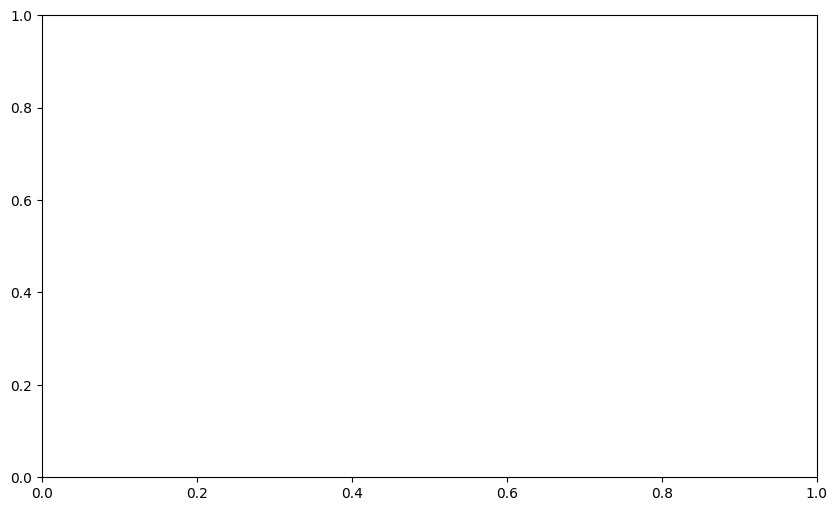

In [6]:
graficarVector(A1, 250)

In [ ]:
graficarVector(A2, 250)

## Consigna 3

Para calcular el mayor autovalor de las matrices, se implemento el metodo de la potencia, inicializado con 250 vectores $x_0$ calculados a partir del metodo Monte Carlo

In [26]:
A1 = np.array([[0.186,0.521,0.014,0.32,0.134],[0.24,0.073,0.219,0.013,0.327],[0.098,0.12,0.311,0.302,0.208],[0.173,0.03,0.133,0.14,0.074],[0.303,0.256,0.323,0.225,0.257]])
A2 = np.array([[0.186,0.521,0.014,0.32,0.134],[0.24,0.073,0.219,0.013,0.327],[0.098,0.12,0.311,0.302,0.208],[0.173,0.03,0.133,0.14,0.074],[0.003,0.256,0.323,0.225,0.257]])


def vectorEstrella(vector):
    # Conjugar y trasponer al mismo tiempo
    vector_hermitiano = np.conjugate(vector.T)
    return vector_hermitiano


def metodoPotencia(A, v, k):

    # Calculamos autovector asociado al autovalor de mayor modulo
    for i in range(k):
        v = A @ v
        # Lo normalizamos para que no siga creciendo y converja
        v = v / np.linalg.norm(v)

    # Calculamos autovalor de mayor modulo
    vEstrella = vectorEstrella(v)
    aval = (vEstrella @ A @ v) / (vEstrella @ v)

    return aval,v

def monteCarlo(A):
    vectores = []
    DE = 0
    for i in range(0,250,1):
        vect = np.random.randint(0,1000,size = A.shape[0])
        res,avect = metodoPotencia(A,vect,8)
        vectores.append(res)
    promedio = np.mean(vectores)
    
    for j in vectores:
        a = np.sqrt((j-np.mean(vectores))**2)
        DE = DE + (pow(a,2))
    desvioEstandar = np.sqrt(DE/len(vectores))
    return promedio, desvioEstandar


prom_a1 ,DE_a1 = monteCarlo(A1) 
prom_a2 ,DE_a2 = monteCarlo(A2) 
tabla = pd.DataFrame({"Promedio":[prom_a1,prom_a2],"Desvio Estandar":[DE_a1,DE_a2]})
tabla.index = ["A1","A2"]
tabla

,Promedio,Desvio Estandar
A1,1.000001,0.000001
A2,0.927665,0.000033


Se ejecuto el metodo de la potencia 8 veces y se vio que los valores tienen un desvio pequeño en relacion al promedio, de e-5 y e-4 para las matrices A1 y A2 respectivamente. Se puede concluir que el autovalor hayado para la matriz A1 es el 1, y para la matriz A2 el 0.927

## Consigna 4 

In [ ]:
matrizConsigna4 = np.linalg.inv(np.identity(A1.shape[0]) - A1)

graficarVector(matrizConsigna4, 10)
vectorDeA_n(10, matrizConsigna4)

##ESTA MAAAL

## Consigna 5

- Creo $ A^{pp} y A^{nn} $ como en el TP1

In [109]:
matriz = pd.read_excel("matriz.xlsx", sheet_name ="LAC_IOT_2011",)
Nic_col = []    
Pry_col = []
for i in range(1,41): #Crea la lista de columnas a filtrar
    Nic_col.append('NICs'+str(i))
    Pry_col.append('PRYs'+str(i))
    
Pry = matriz[matriz["Country_iso3"] == "PRY"] # Crea la tabla con filas de PRY
Nic = matriz[matriz["Country_iso3"] == "NIC"] # Crea la tabla con filas de NIC
# Crea matrices intra-regionales
Pry_int= Pry.loc[:,Pry_col] 
Nic_int = Nic.loc[:,Nic_col]

- uso la funcion de metodo de la potencia con un vector aleatorio y lo comparo con los autovalores dados por __numpy.linalg.eig__

In [116]:
vect_Pry = np.random.randint(0,1000,size = Pry_int.shape[0]) #Creo vector aleatorio
aval_Pry,avect_Pry = metodoPotencia(Pry_int.to_numpy(),vect_Pry,250) #Uso metodo de la potencia
eigval_Pry,eigvect_Pry = LA.eig(Pry_int.to_numpy())

vect_Nic = np.random.randint(0,1000,size = Nic_int.shape[0])
aval_Nic,avect_Nic = metodoPotencia(Nic_int.to_numpy(),vect_Nic,250)
eigval_Nic,eigvect_Nic = LA.eig(Nic_int.to_numpy())

tabla = pd.DataFrame({"Aproximado":[aval_Pry,aval_Nic],"Real":[eigval_Pry[0],eigval_Nic[0]]})
tabla.index = ["Pry","Nic"]
tabla

,Aproximado,Real
Pry,1671.915673,1671.915673+ 0.000000j
Nic,441.458846,441.458846+ 0.000000j


## Consigna 6

## Consigna 7

<center></h1>Creo C dada por:</center></h1>

<center></h1>$C = {\overline{A^{pp}}}^{t} \, \overline{A^{pp}}/(40-1)$</center></h1>

<center></h1>donde  $\; \overline{A^{pp}} = E_{40}A^{pp}$, y $E_{n}$ es dada por: $E_{n} = I_{n} - \frac{1}{n}ee^{t}$</center></h1>

<center></h1>y $e \in \mathbb{R}^{n}$ es un vector columna de todos 1 </center></h1>


In [180]:
n = Pry_int.shape[0]
Id = np.identity(n)
e = np.ones(n)
En = Id - 1/n * (np.atleast_2d(e).T @ np.atleast_2d(e))
C = ((En @ Pry_int.to_numpy()).T @ (En @ Pry_int.to_numpy()))/(40-1) 

Defino la funcion para crear un vector aleatorio de norma 1 y una funcion usando el algoritmo de Hotelling, donde se itera de la siguiente forma:
$$
x_{1} = Cx_{0} / \| Cx_{0} \|
$$
$$
x_{k+1} = Cx_{k} / \| Cx_{k} \|
$$
Para encontrar el primer autovector con maximo autovalor.  
- Para obtener el autovalor se usa el coeficiente de Rayleigh $ \lambda = \frac{v_{1}^{t}Cv_{1}}{v_{1}^{t}v_{1}} $  
- Si tiene autovalor positivo, el criterio de parada va a ser cuando $\| x_{k+1}^{t}\ - x_{k} \|_{2} <$ _valor_ , donde _valor_ es 1e-6.  
- En cambio si su autovalor es negativo, se usa como criterio cuando $ |\lambda_{k}| - |\lambda_{k+1}|$ < _valor_ , esto se debe a que cuando el autovalor es negativo, el autovector va a oscilar entre un vector y su negativo, por lo que la norma de la diferencia siempre va a ser 2. En cambio este segundo criterio si funciona ya que el autovalor si converge.


In [250]:
def create(n):
     x = np.random.normal(size=n)
     x -= x.mean()
     return x / np.linalg.norm(x)
    
def Hotelling(A,v,valor):
    while True:
        v_prev = v
        vEstrella_prev = vectorEstrella(v_prev)
        aval_prev = (vEstrella_prev @ A @ v_prev) / (vEstrella_prev @ v_prev)
        
        v = A @ v
        v = v / np.linalg.norm(v)

        vEstrella = vectorEstrella(v)
        aval = (vEstrella @ A @ v) / (vEstrella @ v)
        res = vEstrella - v_prev
        
        if (aval >=0) and (np.linalg.norm(res,2) < valor):
            return aval,v 
            
        elif (aval < 0) and ((abs(aval)-abs(aval_prev)) < valor):
            return aval,v

Saco $v_{1}$ y $\lambda_{1}$ con la funcion Hotelling y comparo con lo dado por __numpy.linalg.eig__ 

In [255]:
valor = 1e-10
vect = create(n)
avalH, vectH = Hotelling(C,vect,valor)
eigval, eigvect = LA.eig(C)
tabla = pd.DataFrame({"Aproximado":[vectH,avalH],"Real":[eigvect[:,0],eigval[0]]})
tabla.index = ["Autovector","Autovalor"]
display(HTML(tabla.to_html()))

,Aproximado,Real
Autovector,"[-0.40900870476369555, -0.0003399208357932666, 4.610057720355332e-11, -0.011151523489718979, -0.378460880704275, -0.12108109824544845, -0.01366369670777413, -0.24657931945101055, -0.07203194912552974, -0.039034854368637385, -0.01137729154071566, -0.014024736836272122, -0.013210930650364315, -0.06143398982181762, -0.04470192543755348, 4.610057720355331e-11, -0.004135620253108727, -0.032899875106334395, -0.01695282329453265, -0.01913536407538575, -0.017485766638388415, -0.0037788359015559474, -0.0008681203726819965, -0.043891835809417315, -0.005206152972986648, 4.610057720355331e-11, -0.0037400392076999433, -1.2893586812173736e-05, -0.0025892530884956107, -0.0042892441726919235, 1.104800332683174e-08, -0.006111140470566463, -0.05300570442243848, -0.061193612747683326, -0.08461341378437909, -0.1635696283188207, -0.09727376953881062, -0.07425746504377644, -0.10262550132114966, -0.728450235106937]","[-0.4090087047673543, -0.00033992083580566845, 4.610057607724139e-11, -0.011151523490106561, -0.3784608806542302, -0.12108109822641883, -0.013663696706769741, -0.2465793194129284, -0.07203194911907197, -0.03903485437000004, -0.011377291540038572, -0.01402473683692753, -0.013210930650902088, -0.06143398981481452, -0.04470192543920042, 4.6100577204212415e-11, -0.004135620253280921, -0.032899875106828944, -0.016952823295275244, -0.01913536407618905, -0.01748576663920414, -0.003778835901788525, -0.0008681203727354275, -0.04389183581100244, -0.005206152973176799, 4.6100577204212415e-11, -0.003740039207835976, -1.2893586812642952e-05, -0.002589253088589786, -0.004289244172853258, 1.1048003326989693e-08, -0.0061111404707963, -0.05300570442456344, -0.06119361275190778, -0.08461341378812286, -0.16356962832535132, -0.0972737695472178, -0.07425746504873165, -0.10262550132677913, -0.7284502351429782]"
Autovalor,85076.883207,85076.883207


Para encontrar $v_{2}$ y $\lambda_{2}$, se necesita encontrar $C'$, dada por:
$$
C' = C - \lambda_{1}v_{1}v_{1}^{t}
$$
Se vuelve a calcular Hotelling con $C'$ y otro vector aleatorio de norma 1 y se comparan los resultados con los dados por __numpy.linalg.eig__ 

In [257]:
vectHEstrella = vectorEstrella(vectH)
C2 = C - avalH * (vectH @ vectHEstrella)
vect2 = create(n)
avalH2, vectH2 = Hotelling(C2,vect2,valor)
eigval2,eigvect2 = LA.eig(C2)
tabla = pd.DataFrame({"Aproximado":[vectH2,avalH2],"Real":[eigvect2[:,0],eigval2[0]]})
tabla.index = ["Autovector","Autovalor"]
display(HTML(tabla.to_html()))

,Aproximado,Real
Autovector,"[0.1542084825349543, 0.15898740709609688, 0.15899169081689293, 0.1588572394053844, 0.1539368584508138, 0.1573509860730992, 0.1588242744970319, 0.15565684180110953, 0.15805235190300237, 0.1585306364053897, 0.15884127161132372, 0.15882398952853646, 0.1588341395252515, 0.15814730818157519, 0.15846521054971102, 0.15899169081689293, 0.1589441172816805, 0.15860008643121065, 0.15879958351900988, 0.15876510880277148, 0.15875373177762248, 0.15895299812255118, 0.158982803491782, 0.15845806873848242, 0.15892753890264208, 0.15899169081689293, 0.15894567503423634, 0.15899153217964254, 0.1589598337957761, 0.15893882499266893, 0.15899169095254165, 0.15891644050785841, 0.15833315331093747, 0.1583023871556398, 0.1577208993009029, 0.1571191554203539, 0.15800468783096114, 0.15825240706921445, 0.15788614091353226, 0.15118971725871092]","[-0.15420848250579053, -0.15898740710283205, -0.1589916908236546, -0.15885723941125446, -0.15393685841129046, -0.15735098606428513, -0.15882427450230385, -0.1556568417763202, -0.1580523519017295, -0.15853063640900542, -0.15884127161691333, -0.15882398953421684, -0.15883413953097297, -0.15814730818118922, -0.15846521055289214, -0.1589916908236546, -0.15894411728811358, -0.15860008643515175, -0.15879958352442794, -0.15876510880803021, -0.15875373178310784, -0.15895299812902144, -0.1589828034984767, -0.15845806874175974, -0.15892753890899314, -0.1589916908236546, -0.15894567504070278, -0.1589915321864031, -0.15895983380233328, -0.15893882499909354, -0.15899169095930335, -0.15891644051413964, -0.15833315331358574, -0.15830238715793687, -0.15772089930175054, -0.15711915541402924, -0.15800468783083219, -0.15825240707030166, -0.15788614091232156, -0.15118971720771104]"
Autovalor,-3384111.834275,-3384111.834275


## Consigna 8

## Consigna 9

In [ ]:
import funcionesTP1.py

In [ ]:
H = A @ np.linalg.inv(np.identity(A.shape[0]) - A)

def calculoACP(data):
    d, n = data.shape
    m = np.mean(data.values, axis=1)  # Asegúrate de que m sea un array de numpy

    X = data.values - np.tile(m.reshape((len(m), 1)), (1, n))  # Usa data.values para obtener el array de numpy
    Mcov = np.dot(X, X.T) / n  # Covariance Matrix
    
    D, V = np.linalg.eigh(Mcov)
    
    # Ordenamos los autovalores de mayor a menor
    idx = np.argsort(-D)
    D = D[idx]
    V = V[:, idx]
    
    return D, V, X, m

D, V, X, m = calculoACP(H)

# Proyectar los datos en las dos primeras componentes principales
X_reducido = X.T @ V[:, :2]  # Transponer X para que las observaciones sean filas

# Aplicar K-means para encontrar clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Puedes ajustar el número de clusters
clusters = kmeans.fit_predict(X_reducido)

# Convertir el resultado a un DataFrame para facilitar la visualización
df_clusters = pd.DataFrame(X_reducido, columns=['Componente 1', 'Componente 2'])
df_clusters['Cluster'] = clusters

# Graficar los resultados
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clusters, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters en el espacio de componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


